# Imports

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create Data Set

In [148]:
data = pd.read_csv("practice_data.csv")
x = np.array(data["x"])
y = np.array(data["y"])

print(x.shape)
print(y.shape)

(300,)
(300,)


# Plot Data

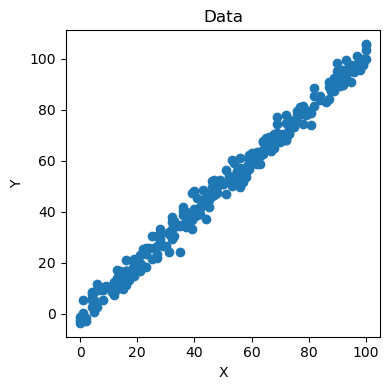

In [149]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

axs.set_title("Data")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.plot(x, y, 'o')

plt.tight_layout()
plt.show()

# some rows of data

In [150]:
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


# Normalize Data

In [151]:
x = np.array([(i / max(x)) for i in x])
y = np.array([(i / max(y)) for i in y])

# Regression Algorithm (manual)


$${\color{orange}f_{w,b}(x) = wx +b}$$
$${\color{orange}J_{w,b}(x) = (1/2m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})^2}$$
$${\color{orange}repeat:}\\$$
$${\color{orange}w = w - alpha\ d/dw(J)}$$
$${\color{orange}b = b - alpha\ d/db(J)}$$
$${\color{orange}d/dw(J) = (1/m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})(x^{ith})}$$
$${\color{orange}d/db(J) = (1/m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})}$$

# F

In [152]:
def F(x, w, b):
    return x * w + b

# Cost Function

In [153]:
def cost(x, y, w, b):
    m = x.shape[0]
    return np.sum((F(x, w, b) - y) ** 2) / (2*m)   

# Compute Gradient

In [154]:
def gradient(x, y, w, b):
    m = x.shape[0]

    f = F(x, w, b) - y
    d_dw = np.sum(f * x) / m
    d_db = np.sum(f) / m

    return d_dw, d_db

# Gradient Descent

In [155]:
def gradient_descent(
    x, y, w_in, b_in, iterations, a, cost_function=None, compute_gradient=None
):
    cost_history = {}

    w, b = w_in, b_in
    for _ in range(iterations+1):
        d_dw, d_db = compute_gradient(x, y, w, b)
        w -= a * d_dw
        b -= a * d_db

        # reporting
        cost = cost_function(x,y,w,b)
        if _ % 10_000 == 0:            
            print(f"iteration: {_}\t|cost: {cost}")
        cost_history[_] = cost
        
    return w, b, cost_history

# Running Gradient Descent

In [156]:
w_in = 0
b_in = 0
iterations = 1_000_000
alpha = 0.0001
w, b, cost_history = gradient_descent(
    x,
    y,
    w_in,
    b_in,
    iterations,
    alpha,
    cost_function=cost,
    compute_gradient=gradient,
)

print(f"\nOptimum Result -->\nw: {w}\nb: {b}")

iteration: 0	|cost: 0.155320382381595
iteration: 10000	|cost: 0.030679859069411335
iteration: 20000	|cost: 0.018817853964467043
iteration: 30000	|cost: 0.015983389836490804
iteration: 40000	|cost: 0.014078612635780719
iteration: 50000	|cost: 0.012446752725863834
iteration: 60000	|cost: 0.011012846159249922
iteration: 70000	|cost: 0.00975001319827304
iteration: 80000	|cost: 0.008637620269038635
iteration: 90000	|cost: 0.007657728220826057
iteration: 100000	|cost: 0.00679455307455431
iteration: 110000	|cost: 0.00603419234149011
iteration: 120000	|cost: 0.0053643995955618565
iteration: 130000	|cost: 0.004774387114021495
iteration: 140000	|cost: 0.004254652120588635
iteration: 150000	|cost: 0.003796823732457394
iteration: 160000	|cost: 0.0033935281383033226
iteration: 170000	|cost: 0.0030382698352352487
iteration: 180000	|cost: 0.0027253270118363436
iteration: 190000	|cost: 0.0024496593923294405
iteration: 200000	|cost: 0.002206827057594171
iteration: 210000	|cost: 0.0019929189355648858
it

### Plot Output

Text(0.5, 1.0, 'cost per iteration')

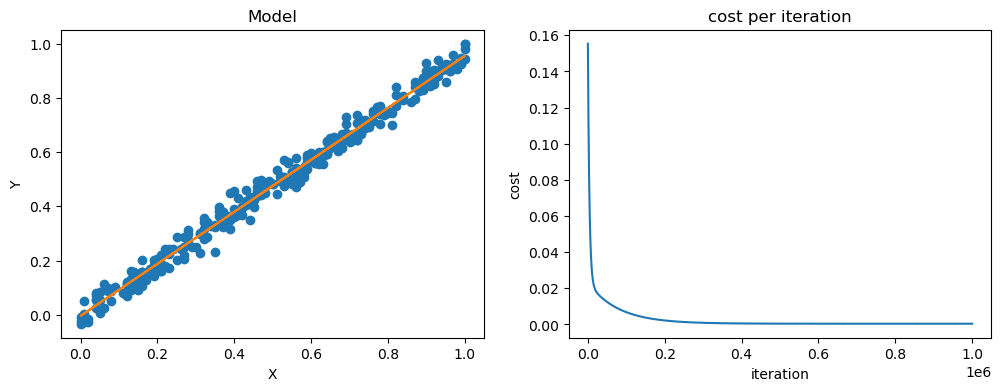

In [157]:
fig, (ex1, ex2) = plt.subplots(1,2, figsize=(12,4))

ex1.plot(x, y, 'o')
y_hat = w * x + b
ex1.plot(x, y_hat)
ex1.set_xlabel("X")
ex1.set_ylabel("Y")
ex1.set_title("Model")

ex2.plot(list(cost_history.keys()), list(cost_history.values()))
ex2.set_xlabel("iteration")
ex2.set_ylabel("cost")
ex2.set_title("cost per iteration")

# Accuracy

In [158]:
def accuracy(X, Y):
    sum = 0
    length = len(X)
    for i in range(length):
        model_output = round(F(X[i], w, b), 2)
        actual_output = Y[i]
        if i % 20 == 0:
            print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - (abs(model_output - actual_output) / actual_output)) * 100
    return sum/length

accuracy_final = accuracy(x, y)
print(f"\n\n***********************\n*** Accuracy {round(accuracy_final, 2)}% ***\n***********************")

0.77 -> model -> 0.74	|	actual output -> 0.7555049130573185
0.89 -> model -> 0.85	|	actual output -> 0.8724070435842164
0.91 -> model -> 0.87	|	actual output -> 0.9002723205759158
0.13 -> model -> 0.12	|	actual output -> 0.13311378135644245
0.68 -> model -> 0.65	|	actual output -> 0.6664329030167697
0.02 -> model -> 0.02	|	actual output -> -0.015464909870519112
0.64 -> model -> 0.61	|	actual output -> 0.5950096620868067
0.71 -> model -> 0.68	|	actual output -> 0.666181200417125
0.42 -> model -> 0.4	|	actual output -> 0.369187384962403
0.17 -> model -> 0.16	|	actual output -> 0.14074567089525267
0.78 -> model -> 0.74	|	actual output -> 0.7424516128910059
0.07 -> model -> 0.06	|	actual output -> 0.08790167850805702
0.92 -> model -> 0.88	|	actual output -> 0.90343915361829
0.16 -> model -> 0.15	|	actual output -> 0.1593721390633059
0.19 -> model -> 0.18	|	actual output -> 0.20291699015087225


***********************
*** Accuracy 91.94% ***
***********************
